### Second level difficulty
Vectorization using lagrange interpolation

First we set up rendering of pyramid using axonometric projection

In [1]:
import numpy as np
from graphics import *

In [2]:
# Rotation matrix around the X-axis
def rotation_matrix_x(angle):
    rad = np.radians(angle)
    return np.array([
        [1, 0, 0, 0],
        [0, np.cos(rad), -np.sin(rad), 0],
        [0, np.sin(rad), np.cos(rad), 0],
        [0, 0, 0, 1]
    ])

In [3]:
# Rotation matrix around the Y-axis
def rotation_matrix_y(angle):
    rad = np.radians(angle)
    return np.array([
        [np.cos(rad), -np.sin(rad), 0, 0],
        [np.sin(rad), np.cos(rad), 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ]
    )

In [4]:
# Rotation matrix around the Z-axis
def rotation_matrix_z(angle):
    rad = np.radians(angle)
    return np.array([
        [np.cos(rad), 0, -np.sin(rad), 0],
        [0, 1, 0, 0],
        [np.sin(rad), 0, np.cos(rad), 0],
        [0, 0, 0, 1]
    ]
    )

In [5]:
# Axonometric projection matrix
def get_projection_matrix():
    return np.array([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 1]
    ])


In [6]:

def project_vertices(vertices, projection_matrix):
    projected = np.dot(vertices, projection_matrix.T)
    return projected[:, :2]  # Return only x and y for 2D drawing


In [7]:

def draw_pyramid(win, vertices_2d):
    # Draw base
    base = Polygon([Point(*vertex) for vertex in vertices_2d[:4]])
    base.draw(win)

    # Draw sides
    for i in range(4):
        side = Line(Point(vertices_2d[i][0], vertices_2d[i][1]), Point(vertices_2d[4][0], vertices_2d[4][1]))
        side.draw(win)
        


In [8]:
pyramid_vertices = np.array([
    [0, 0, 0, 1],  # Base vertices
    [100, 0, 0, 1],
    [100, 100, 0, 1],
    [0, 100, 0, 1],
    [50, 50, 100, 1]  # Top vertex
])

win = GraphWin("Pyramid Axonometric Projection", 400, 400)
win.setBackground('white')

rotated_vertices = pyramid_vertices @ rotation_matrix_x(-80)
rotated_vertices = rotated_vertices @ rotation_matrix_z(20)

projection_matrix = get_projection_matrix()

vertices_2d = project_vertices(rotated_vertices, projection_matrix)

vertices_2d += np.array([200, 200])  # Center the pyramid in the window

draw_pyramid(win, vertices_2d)

win.getMouse()
win.close()


Rasterization of vector representation of the pyramid

In [9]:
print(vertices_2d)

[[200.         200.        ]
 [293.96926208 200.        ]
 [327.65167096 217.36481777]
 [233.68240888 217.36481777]
 [269.76495294 110.20163358]]


In [10]:
#------------------------- алгоритм Брезенхема для растрофікації ліній ----------------------------------
def draw_line_pixel (win, x1, y1, x2, y2):
    result = []
    
    dx = x2 - x1;  dy = y2 - y1
    sign_x = 1 if dx > 0 else -1 if dx < 0 else 0
    sign_y = 1 if dy > 0 else -1 if dy < 0 else 0
    if dx < 0: dx = -dx
    if dy < 0: dy = -dy
    if dx > dy:
        pdx, pdy = sign_x, 0
        es, el = dy, dx
    else:
        pdx, pdy = 0, sign_y
        es, el = dx, dy
    x, y = x1, y1
    error, t = el / 2, 0

    win.plot(x, y, 'blue')
    result.append((x,y))

    while t < el:
        error -= es
        if error < 0:
            error += el
            x += sign_x
            y += sign_y
        else:
            x += pdx
            y += pdy
        t += 1
        win.plot(x, y, 'blue')
        result.append((x,y))

    return result

In [11]:
def draw_pyramid_edges(win, vertices_2d):
    lines = []
    # Draw the base of the pyramid
    for i in range(4):
        lines.append(draw_line_pixel(win, vertices_2d[i][0], vertices_2d[i][1], vertices_2d[(i+1) % 4][0], vertices_2d[(i+1) % 4][1]))
    # Draw the sides connecting the base to the apex
    apex = vertices_2d[4]
    for i in range(4):
        lines.append(draw_line_pixel(win, vertices_2d[i][0], vertices_2d[i][1], apex[0], apex[1]))
        
    return lines

In [12]:
win = GraphWin("Rasterized Pyramid", 400, 400)
win.setBackground('white')

# Draw all edges of the pyramid
lines = draw_pyramid_edges(win, vertices_2d)

win.getMouse()  
win.close()    


Vectorization using Lagrangian Polynomial of raster representation of a pyramid

In [13]:
for line in lines:
    print(f"This edge consists of {len(line)} points")
    x_points, y_points = zip(*line)
    print(f'The x points for this edge:', x_points[:10])
    print(f'The x points for this edge:', y_points[:10])
    

This edge consists of 95 points
The x points for this edge: (200.0, 201.0, 202.0, 203.0, 204.0, 205.0, 206.0, 207.0, 208.0, 209.0)
The x points for this edge: (200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0)
This edge consists of 35 points
The x points for this edge: (293.9692620785909, 294.9692620785909, 295.9692620785909, 296.9692620785909, 297.9692620785909, 298.9692620785909, 299.9692620785909, 300.9692620785909, 301.9692620785909, 302.9692620785909)
The x points for this edge: (200.0, 201.0, 201.0, 202.0, 202.0, 203.0, 203.0, 204.0, 204.0, 205.0)
This edge consists of 95 points
The x points for this edge: (327.6516709619374, 326.6516709619374, 325.6516709619374, 324.6516709619374, 323.6516709619374, 322.6516709619374, 321.6516709619374, 320.6516709619374, 319.6516709619374, 318.6516709619374)
The x points for this edge: (217.36481776669305, 217.36481776669305, 217.36481776669305, 217.36481776669305, 217.36481776669305, 217.36481776669305, 217.36481776669305, 

In [14]:
def lagrange_interpolation(x_points, y_points):
    """ Compute Lagrange interpolation polynomial from points """
    def polynomial(x):
        total_sum = 0
        n = len(x_points)
        for i in range(n):
            xi, yi = x_points[i], y_points[i]
            term = yi
            for j in range(n):
                if i != j:
                    xj = x_points[j]
                    if xi == xj:  # Handle potential division by zero if xi and xj are identical
                        continue
                    term *= (x - xj) / (xi - xj)
            total_sum += term
        return total_sum
    return polynomial

def plot_lagrange(win, x_points, y_points, color='red'):
    """ Plot the Lagrange interpolated curve """
    poly = lagrange_interpolation(x_points, y_points)
    x_min, x_max = min(x_points), max(x_points)
    x_range = np.linspace(x_min, x_max, num=300)  # Use a high number for smoother results
    for x in x_range:
        y = poly(x)
        win.plot(int(x), int(y), color)

In [15]:

win = GraphWin("Rasterized and Interpolated Line", 400, 400)
win.setBackground('white')

for i, line in enumerate(lines):
        for x, y in line:
            win.plot(x, y, 'blue')
            
        x_points, y_points = zip(*line)
        x_points = [x for i, x in enumerate(x_points) if i%15==0 ]
        y_points = [y for i, y in enumerate(y_points) if i%15==0 ]
        plot_lagrange(win, x_points, y_points)

win.getMouse()
win.close()


#### Edge removal
I skipped this task because I couldn't do it.

#### EDge detection

In [16]:
from PIL import Image, ImageDraw
from pylab import *
import sys

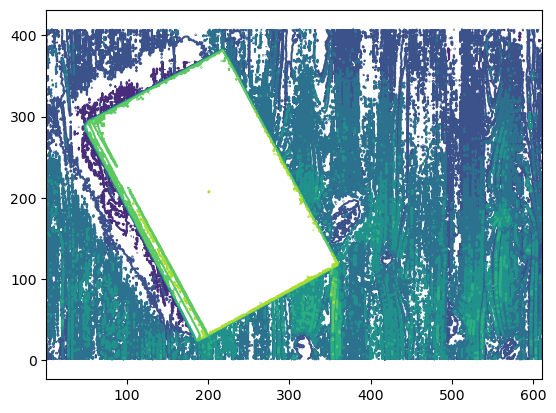

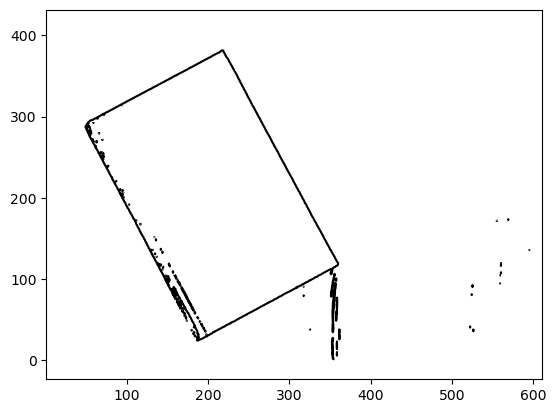

In [18]:
im = array(Image.open(r'book.jpg').convert('L'))
image = Image.open(r"book.jpg")
figure()
contour(im, origin='image')
axis('equal')
show()
contour(im, levels=[170], colors='black', origin='image')
axis('equal')
show()